In [ ]:
import os
import random
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
import IPython.display as ipd
from pylab import figure, axes, pie, title, show


In [ ]:
cd C:\Users\Charles\Desktop\AI Cough Detection\Cough

In [ ]:
# Class Distribution
df_data = pd.read_csv('train_labels.csv')
g = sns.countplot(df_data['label'])
df_data['label'].value_counts()

In [ ]:
# define directories
base_dir = "./"
esc_dir = os.path.join(base_dir, "cough")
meta_file = os.path.join(base_dir, "train_labels_2000.csv")
audio_dir = os.path.join(base_dir, "train/")

In [ ]:
'''#Converting the contents into a list
list_array=os.listdir(audio_dir)
for y in range(len(list_array)): 
    print list_array[y]

In [ ]:
# load metadata
meta_data = pd.read_csv(meta_file)
meta_data

In [ ]:
# load a wave data
def load_wave_data(audio_dir, file_name):
    file_path = os.path.join(audio_dir, file_name)
    x, fs = librosa.load(file_path, sr=44100)
    return x,fs

In [ ]:
# change wave data to mel-stft
def calculate_melsp(x, n_fft=1024, hop_length=128):
    stft = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))**2
    log_stft = librosa.power_to_db(stft)
    melsp = librosa.feature.melspectrogram(S=log_stft,n_mels=128)
    return melsp

In [ ]:
# display wave in plots
def show_wave(x):
    plt.plot(x)
    plt.show()

In [ ]:
# display wave in heatmap
def show_melsp(melsp, fs):
    librosa.display.specshow(melsp, sr=fs)
    plt.colorbar()
    plt.show()
    plt.savefig(str({0})+'.png')

In [ ]:
# example data
x, fs = load_wave_data(audio_dir, meta_data.loc[0,"filename"])
melsp = calculate_melsp(x)
print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x.shape, melsp.shape, fs))
show_wave(x)
show_melsp(melsp, fs)


In [ ]:
ipd.Audio(x, rate=fs)

In [ ]:
# data augmentation: add white noise
def add_white_noise(x, rate=0.002):
    return x + rate*np.random.randn(len(x))

In [ ]:
x_wn = add_white_noise(x)
melsp = calculate_melsp(x_wn)
print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x_wn.shape, melsp.shape, fs))
show_wave(x_wn)
show_melsp(melsp, fs)

In [ ]:
ipd.Audio(x_wn, rate=fs)

In [ ]:
# data augmentation: shift sound in timeframe
def shift_sound(x, rate=2):
    return np.roll(x, int(len(x)//rate))

In [ ]:
x_ss = shift_sound(x)
melsp = calculate_melsp(x_ss)
print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x_ss.shape, melsp.shape, fs))
show_wave(x_ss)
show_melsp(melsp, fs)

In [ ]:
ipd.Audio(x_ss, rate=fs)

In [ ]:
# data augmentation: stretch sound
def stretch_sound(x, rate=1.1):
    input_length = len(x)
    x = librosa.effects.time_stretch(x, rate)
    if len(x)>input_length:
        return x[:input_length]
    else:
        return np.pad(x, (0, max(0, input_length - len(x))), "constant")

In [ ]:
x_st = stretch_sound(x)
melsp = calculate_melsp(x_st)
print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x_st.shape, melsp.shape, fs))
show_wave(x_st)
show_melsp(melsp, fs)


In [ ]:
ipd.Audio(x_st, rate=fs)

In [ ]:
'''!git init
!git add .
!git commit -m "Initial commit"
!git remote add origin https://github.com/CharlesNJohn/Cough.git
!git push -f origin master

In [ ]:
!git remote -v

In [ ]:
!git push origin master

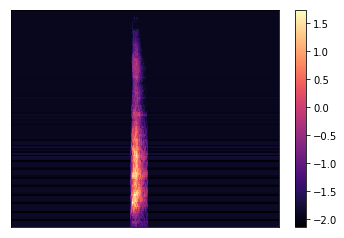

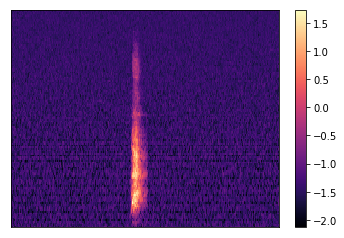

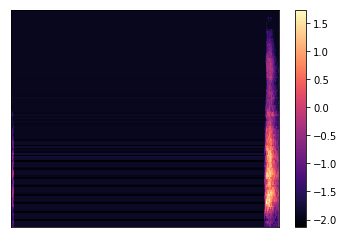

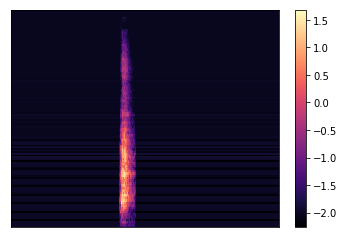

0


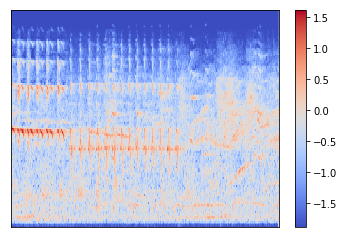

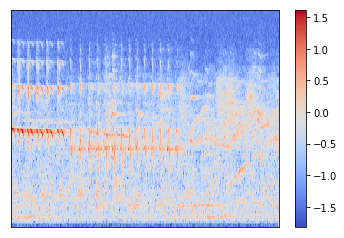

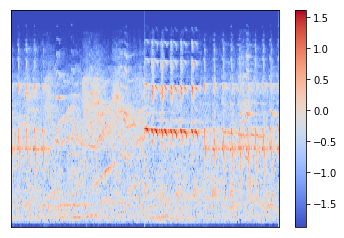

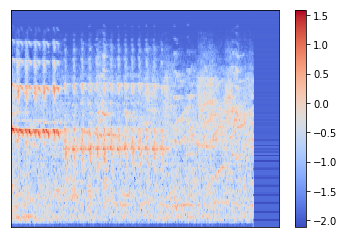

1


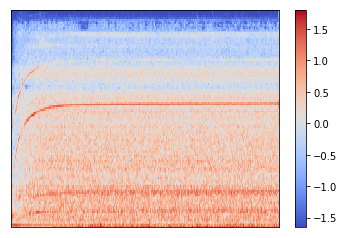

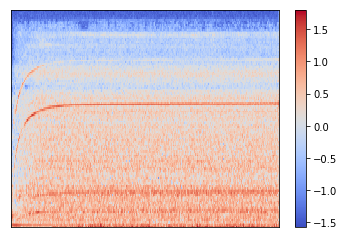

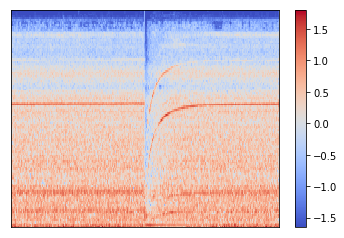

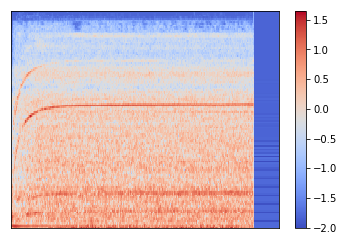

2


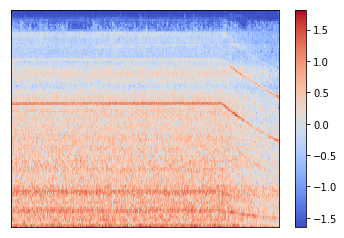

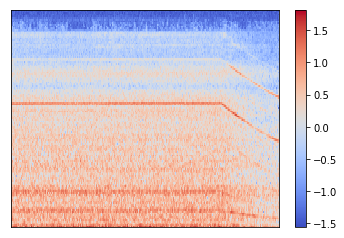

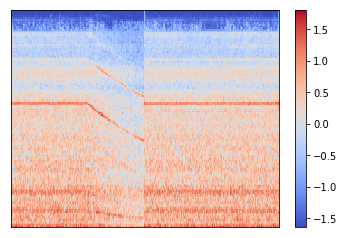

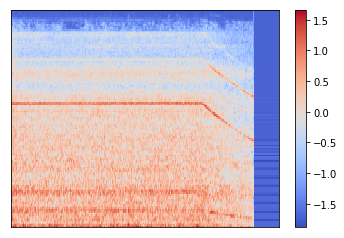

3


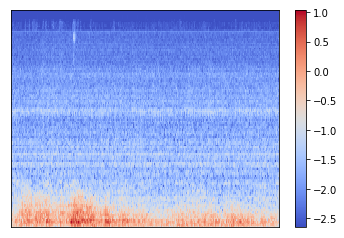

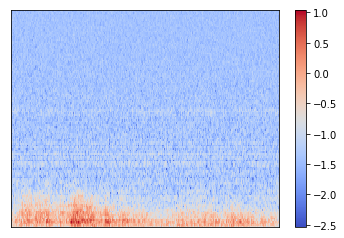

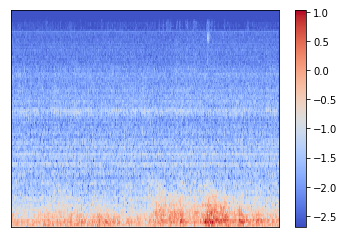

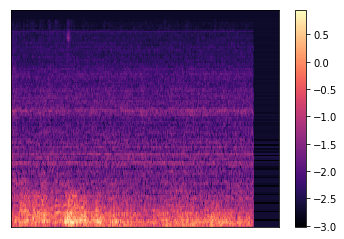

4


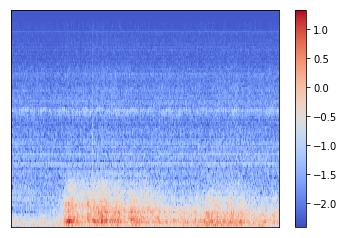

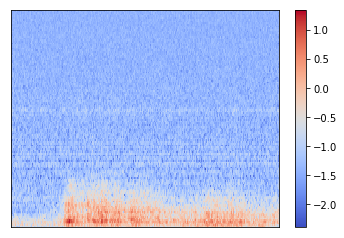

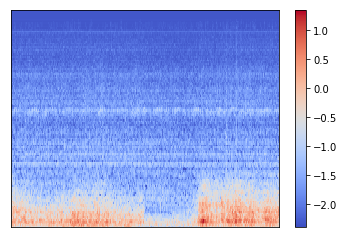

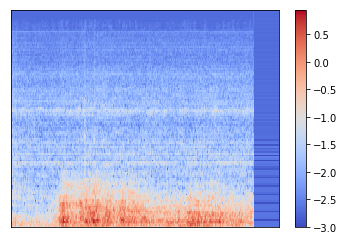

5


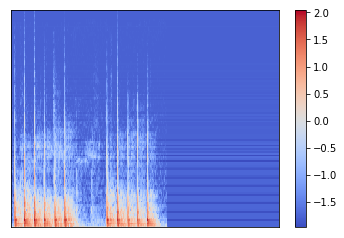

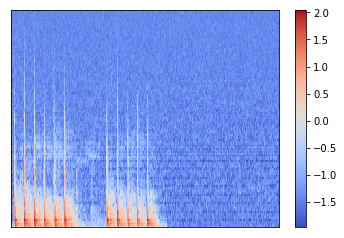

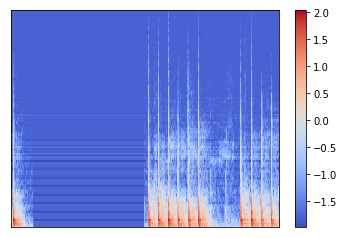

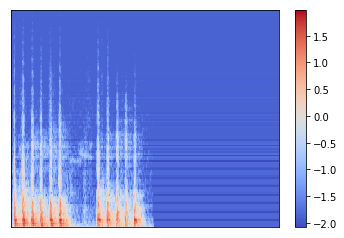

6


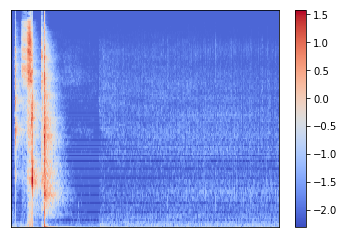

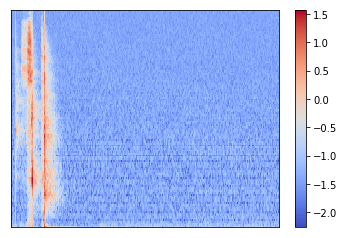

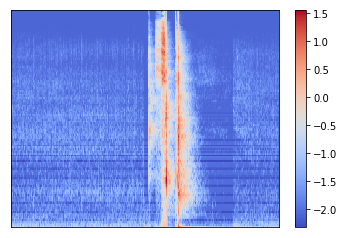

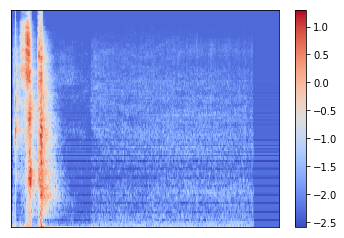

7


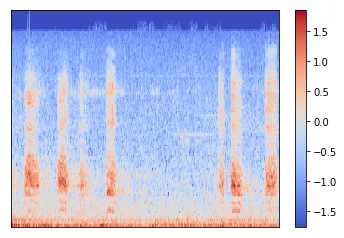

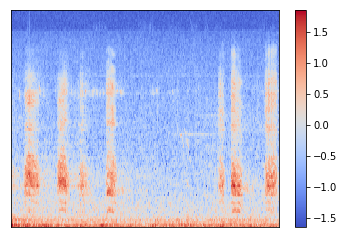

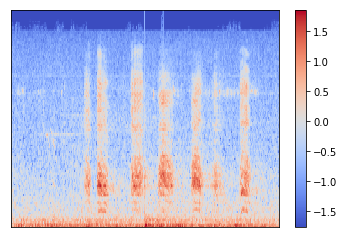

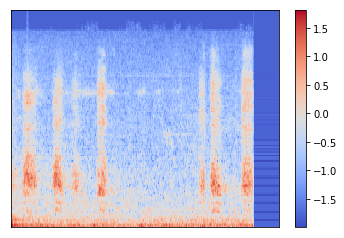

8


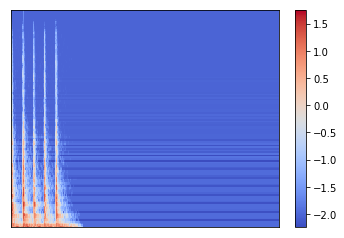

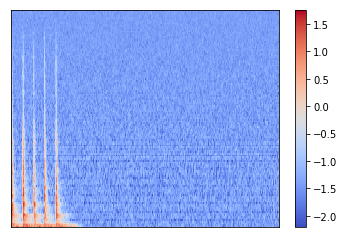

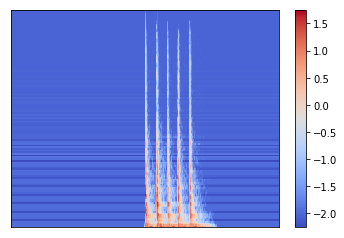

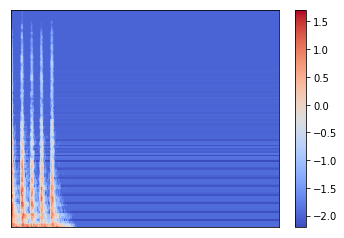

9


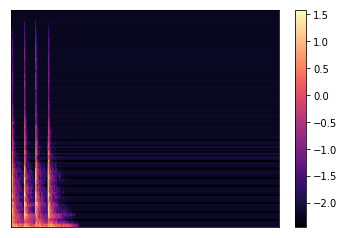

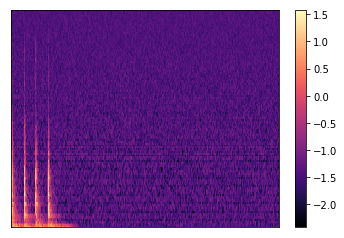

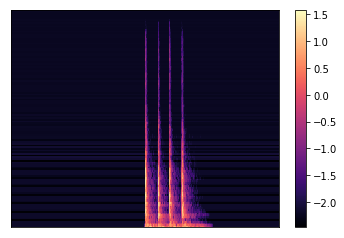

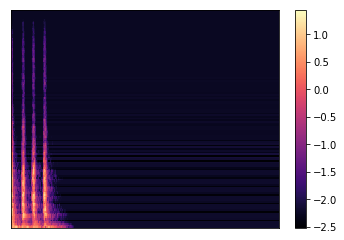

10


KeyboardInterrupt: 

In [82]:
i=0
for filename in os.listdir(audio_dir):
    for i in range(0, 2000):
        if filename.endswith(".wav"):
        # example data
        
            x, fs = load_wave_data(audio_dir, meta_data.loc[i,"filename"])
            melsp = calculate_melsp(x)
            #print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x.shape, melsp.shape, fs))
            show_melsp(melsp, fs)

            x_wn = add_white_noise(x)
            melsp = calculate_melsp(x_wn)
            #print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x_wn.shape, melsp.shape, fs))
            show_melsp(melsp, fs)
            #plt.savefig(str(x)+'.png')

            x_ss = shift_sound(x)
            melsp = calculate_melsp(x_ss)
            #print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x_ss.shape, melsp.shape, fs))
            show_melsp(melsp, fs)

            x_st = stretch_sound(x)
            melsp = calculate_melsp(x_st)
            #print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x_st.shape, melsp.shape, fs))
            show_melsp(melsp, fs)
            print(i)
            continue
        else:
            continue